In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#Read in csv files:
crime4 = pd.read_csv('Chicago_Crimes_2012_to_2017.csv')

In [4]:
crime4.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [5]:
crime4.columns

Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

# EDA

In [6]:
crime4['Arrest'].value_counts()
#drop this column

False    1079242
True      377472
Name: Arrest, dtype: int64

In [7]:
crime4['Domestic'].value_counts()
#drop this column

False    1236660
True      220054
Name: Domestic, dtype: int64

In [ ]:
crime4['Location'].value_counts()
#'Location' column contains (lat,long) --> drop lat, long columns

In [8]:
#List of columns to drop
drop_list = ['Unnamed: 0','Arrest', 'Domestic','Latitude', 'Longitude', 'Updated On']

In [9]:
crime4.drop(drop_list, axis = 1, inplace= True)

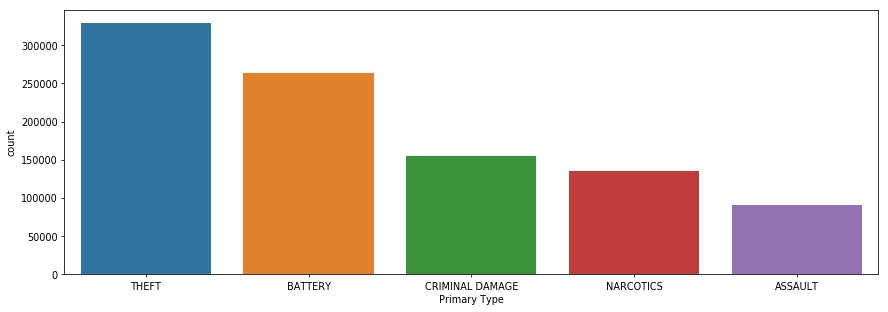

In [10]:
#Plot top 5 charge types ('Primary Type')
plt.figure(figsize = (15,5), dpi=70)
sns.countplot(x= crime4['Primary Type'], order = crime4['Primary Type'].value_counts().iloc[:5].index)
#https://stackoverflow.com/questions/32891211/limit-the-number-of-groups-shown-in-seaborn-countplot

# Goal: group charges into top 5 primary type, the rest will be grouped as "OTHERS"

In [11]:
#5 primary types:
crime4['Primary Type'].value_counts().head(5).index.tolist()
#https://stackoverflow.com/questions/35523635/extract-values-in-pandas-value-counts

['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'ASSAULT']

In [12]:
crime4['Primary Type'].nunique()

33

In [13]:
#Total of 33 unique values, 5 top --> 33-5 = 28 tails
#List of values that will be re-assign as "OTHERS"
other_list = crime4['Primary Type'].value_counts().tail(28).index.tolist()

In [14]:
crime4['Primary Type'].replace(to_replace = other_list, value = 'OTHERS', inplace = True)

In [15]:
crime4['Primary Type'].value_counts()

OTHERS             481570
THEFT              329460
BATTERY            263700
CRIMINAL DAMAGE    155455
NARCOTICS          135240
ASSAULT             91289
Name: Primary Type, dtype: int64

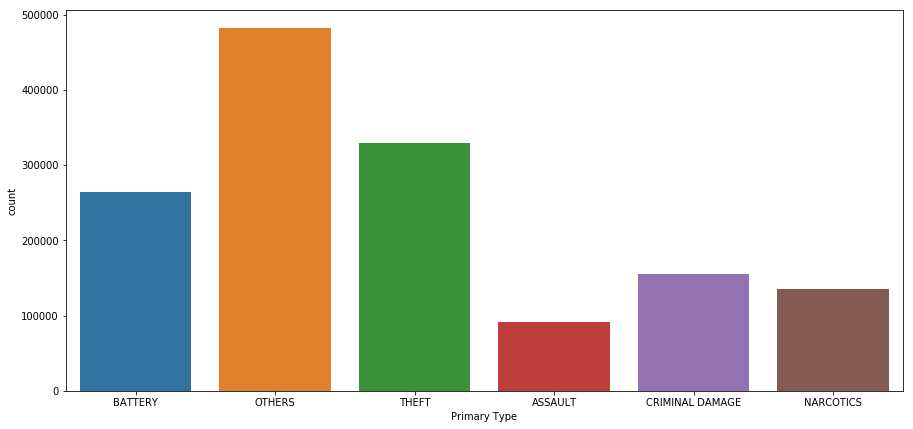

In [16]:
plt.figure(figsize =(15,7))
sns.countplot(crime4['Primary Type'])

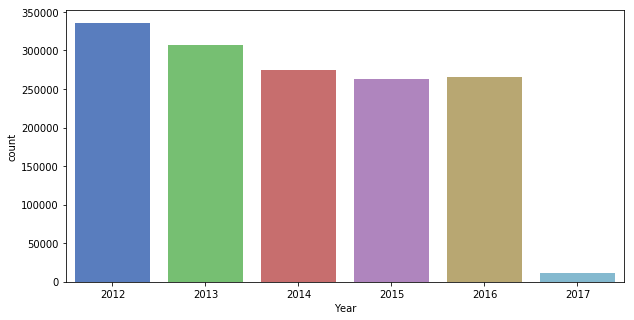

In [17]:
#Plot by Year:
plt.figure(figsize = (10,5))
sns.countplot('Year', data = crime4, palette = "muted")

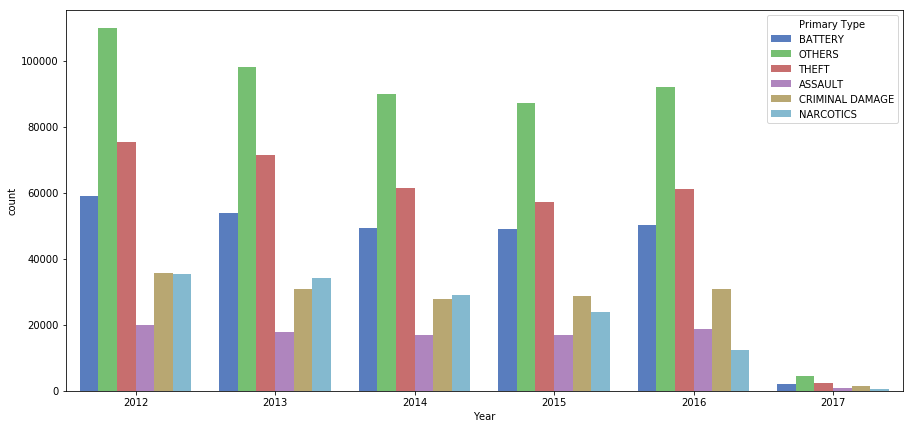

In [18]:
#Plot by year with primary type as hue:
plt.figure(figsize = (15,7))
sns.countplot('Year', data = crime4, hue = 'Primary Type', palette = "muted")

In [ ]:
#Plot by year using pandas built-in function:
#crime4['Year'].plot.bar()
#doesn't work very well

In [21]:
#Date column:
type(crime4['Date'].iloc[0])

str

In [22]:
#Convert date column to date format:
crime4['Date'] = pd.to_datetime(crime4['Date'])
#takes awhile to load

In [23]:
type(crime4['Date'].iloc[0])

pandas._libs.tslib.Timestamp

In [24]:
#organize data into months:
crime4['Month'] = crime4['Date'].apply(lambda time: time.month)

In [25]:
crime.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Location,Month
0,10508693,HZ250496,2016-05-03 23:40:00,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,1022,10.0,24.0,29.0,08B,1154907.0,1893681.0,2016,"(41.864073157, -87.706818608)",5
1,10508695,HZ250409,2016-05-03 21:40:00,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,313,3.0,20.0,42.0,08B,1183066.0,1864330.0,2016,"(41.782921527, -87.60436317)",5
2,10508697,HZ250503,2016-05-03 23:31:00,053XX W CHICAGO AVE,0470,OTHERS,RECKLESS CONDUCT,STREET,1524,15.0,37.0,25.0,24,1140789.0,1904819.0,2016,"(41.894908283, -87.758371958)",5
3,10508698,HZ250424,2016-05-03 22:10:00,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,1532,15.0,28.0,25.0,08B,1143223.0,1901475.0,2016,"(41.885686845, -87.749515983)",5
4,10508699,HZ250455,2016-05-03 22:00:00,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,1523,15.0,28.0,25.0,06,1139890.0,1901675.0,2016,"(41.886297242, -87.761750709)",5


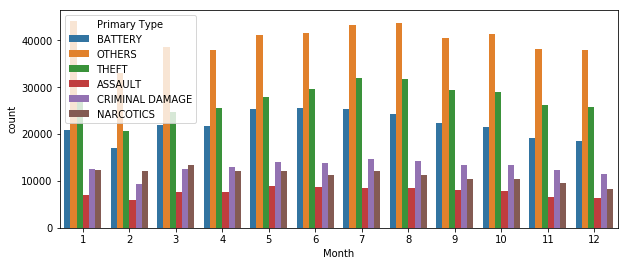

In [35]:
#Plot by month:
plt.figure(figsize = (10,4))
sns.countplot(x= 'Month', data = crime4, hue = 'Primary Type')

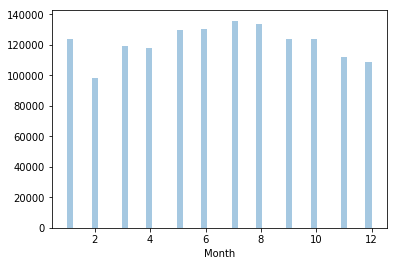

In [31]:
sns.distplot(crime4['Month'], kde = False)